<h1>Kaggle Machine Learning and Data Science Survey</h1>
<b>Éverton Bin</b><br>

<h2>Table of Contents</h2>
<ol>
    <a href = '#intro'><li><b>Introduction</b></li></a>
    <a href = '#load'><li><b>Loading Data</b></li></a>
    <a href = '#analysis'><li><b>Exploratory Analysis</b></li></a>
        <ol>
            <a href = '#q1'><li><b>Educational Background</b></li></a>
            <a href = '#q2'><li><b>Activities</b></li></a>
            <a href = '#q3'><li><b>Tools</b></li></a>
            <a href = '#q4'><li><b>Salary</b></li></a>
        </ol>
    <a href = '#model'><li><b>Predictive Model</b></a>
        <ol>
            <a href = '#model1'><li><b>Transformations</b></li></a>
            <a href = '#model2'><li><b>Feature Selection</b></li></a>
            <a href = '#model3'><li><b>Model Training</b></li></a>
            <a href = '#model4'><li><b>Model Evaluation</b></li></a>
        </ol>
     <a href = '#conclusion'><li><b>Conclusion</b></li></a>
</ol>

<h2>1- Introduction</h2>

<p>
    Data Science has become more and more popular over the years and probably one of the most common questions is: <b>how do I get started in this field?</b>. And one common answer to the previous question is: <b>work on some competitions in the Kaggle platform</b>.
</p>
<p>
    <a href = "https://www.kaggle.com/">Kaggle</a> is indeed one of the most popular platforms when it comes to Data Science and even if you are not willing to compete, there is a long list of datasets available for you to work on and sharpen your abilities. One of these datasets is the <a href = "https://www.kaggle.com/c/kaggle-survey-2019/">2019 Kaggle Machine Learning and Data Science Survey</a>, and that is the one I am going to use in this project to see what we can learn from it.
</p>
<p>
    The target questions that are going to guide the following workflow are:
    <li><i>What is the educational background of those working as data scientists / analysts? Which courses have they attended if any?</i></li>
    <li><i>Which are the main activities that they have to perform in their companies? Would it be all about machine learning?</i></li>
    <li><i>Which programming language, machine learning frameworks and relational databases do they use the most?</i></li>
    <li><i>Are there some specific characteristics that could affect their salary?</i></li>
</p>
<p>
    Finally, one model will be created to see how well we can distinguish the different professions in Data Science field, given other information like salary, courses attended and activities performed.
</p>

<h2>2- Loading Data</h2>

In [1]:
# Loading packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [2]:
# Reading the file:
survey = pd.read_csv('multiple_choice_responses.csv')
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [3]:
# Checking dataframe's shape:
survey.shape

(19718, 246)

<p>
    As we can see, there are 246 different variables available in the survey and almost 20000 observations. The first row contains the explanation for each one of the questions. Because of that, I have decided to delete this first row and transform column names so they can relate to the content of the question.
</p>
<p>
    Also, in a previous analysis, I have already selected some columns of interest that could help answering the target questions.
</p>

In [4]:
# List for selecting columns of interest:
target_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 
                  'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 
                  'Q10', 
                  'Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 'Q13_Part_7', 
                  'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10', 'Q13_Part_11', 'Q13_Part_12', 
                  'Q15', 
                  'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 
                  'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_11', 'Q18_Part_12', 
                  'Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_4', 'Q28_Part_5', 'Q28_Part_6', 'Q28_Part_7', 
                  'Q28_Part_8', 'Q28_Part_9', 'Q28_Part_10', 'Q28_Part_11', 'Q28_Part_12', 
                  'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 
                  'Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12']

# Dictionary for transforming columns' name to more informative values:
columns_names = {'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Res_Country', 'Q4': 'Education', 
                 'Q5': 'Current_Role', 'Q6': 'Company_Size', 
                 'Q9_Part_1': 'actv_Data-Analysis', 'Q9_Part_2': 'actv_Data-Infra', 'Q9_Part_3': 'actv_ML-Prototypes', 
                 'Q9_Part_4': 'actv_ML-Services', 'Q9_Part_5': 'actv_ML-Improvement', 'Q9_Part_6': 'actv_ML-Reserach', 
                 'Q9_Part_7': 'actv_None', 'Q9_Part_8': 'actv_Other', 
                 'Q10': 'Annual_Income', 
                 'Q13_Part_1': 'course_Udacity', 'Q13_Part_2': 'course_Coursera', 'Q13_Part_3': 'course_edX', 
                 'Q13_Part_4': 'course_DataCamp', 'Q13_Part_5': 'course_DataQuest', 'Q13_Part_6': 'course_Kaggle', 
                 'Q13_Part_7': 'course_Fast-ai', 'Q13_Part_8': 'course_Udemy', 'Q13_Part_9': 'course_LinkedIn', 
                 'Q13_Part_10': 'course_University-Degree', 'Q13_Part_11': 'course_None', 'Q13_Part_12': 'course_Other', 
                 'Q15': 'Years_Coding', 
                 'Q18_Part_1': 'prog_Python', 'Q18_Part_2': 'prog_R', 'Q18_Part_3': 'prog_SQL', 'Q18_Part_4': 'prog_C', 
                 'Q18_Part_5': 'prog_C++', 'Q18_Part_6': 'prog_Java', 'Q18_Part_7': 'prog_Javascript', 
                 'Q18_Part_8': 'prog_Typerscript', 'Q18_Part_9': 'prog_Bash', 'Q18_Part_10': 'prog_MATLAB', 
                 'Q18_Part_11': 'prog_None', 'Q18_Part_12': 'prog_Other', 
                 'Q28_Part_1': 'ml_framew_Scikit', 'Q28_Part_2': 'ml_framew_TensorFlow', 'Q28_Part_3': 'ml_framew_Keras', 
                 'Q28_Part_4': 'ml_framew_RandomForest', 'Q28_Part_5': 'ml_framew_Xgboost', 'Q28_Part_6': 'ml_framew_Pytorch', 
                 'Q28_Part_7': 'ml_framew_Caret', 'Q28_Part_8': 'ml_framew_LightGBM', 'Q28_Part_9': 'ml_framew_SparkMLib', 
                 'Q28_Part_10': 'ml_framew_Fast-ai', 'Q28_Part_11': 'ml_framew_None', 'Q28_Part_12': 'ml_framew_Other', 
                 'Q34_Part_1': 'relDB_MySQL', 'Q34_Part_2': 'relDB_PostgresSQL', 'Q34_Part_3': 'relDB_SQLite', 
                 'Q34_Part_4': 'relDB_SQLServer', 'Q34_Part_5': 'relDB_Oracle', 'Q34_Part_6': 'relDB_Access', 
                 'Q34_Part_7': 'relDB_AWS-relDB-Server', 'Q34_Part_8': 'relDB_AWS-DynamoDB', 'Q34_Part_9': 'relDB_AzureSQL', 
                 'Q34_Part_10': 'relDB_GoogleCloudSQL', 'Q34_Part_11': 'relDB_None', 'Q34_Part_12': 'relDB_Other'}

In [5]:
# Selecting columns of interest:
survey = survey[target_columns]

# Deleting first row and updating the index:
survey = survey.drop([0], axis = 0).reset_index(drop = True)

# Changing columns' name:
survey.rename(columns = columns_names, inplace = True)

# Checking first rows after transformations:
survey.head()

,Age,Gender,Res_Country,Education,Current_Role,Company_Size,actv_Data-Analysis,actv_Data-Infra,actv_ML-Prototypes,actv_ML-Services,...,relDB_SQLite,relDB_SQLServer,relDB_Oracle,relDB_Access,relDB_AWS-relDB-Server,relDB_AWS-DynamoDB,relDB_AzureSQL,relDB_GoogleCloudSQL,relDB_None,relDB_Other
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking dataframe's shape after transformations:
survey.shape

(19717, 64)

<p>
    We have now reduced our original 264 columns to 64 columns of interest.
</p>
<p>
    Next step, let's check which position people who participated in the survey play in their companies, once we are interested only in roles related to Data Science.
</p>

In [7]:
# Counting observations for different roles:
survey.Current_Role.value_counts()

Data Scientist             4085
Student                    4014
Software Engineer          2705
Other                      1690
Data Analyst               1598
Research Scientist         1470
Not employed                942
Business Analyst            778
Product/Project Manager     723
Data Engineer               624
Statistician                322
DBA/Database Engineer       156
Name: Current_Role, dtype: int64

<p>
    Although the roles represent different fields and specializations, let's assume that the roles most related to Data Science, representing activities that often overlap one another, are: <b>Data Scientist</b>, <b>Data Analyst</b>, <b>Business Analyst</b>, <b>Data Engineer</b> and <b>DBA/Database Engineer</b>.
</p>

In [8]:
# Filtering dataframe to the specific roles of interest:
roles_list = ['Data Scientist', 'Data Analyst', 'Business Analyst', 'Data Engineer', 'DBA/Database Engineer']
ds_survey = survey[survey['Current_Role'].isin(roles_list)].reset_index(drop = True)
ds_survey.shape

(7241, 64)

<p>
    After this first filter and transformations, we start our exploratory analysis in order to answer the questions previously proposed.
</p>

<h2>3- Exploratory Analysis</h2>

<h3>Educational Background</h3>

In [9]:
ds_survey.Education.value_counts()

Master’s degree                                                      3723
Bachelor’s degree                                                    1921
Doctoral degree                                                       957
Professional degree                                                   241
Some college/university study without earning a bachelor’s degree     231
I prefer not to answer                                                 99
No formal education past high school                                   69
Name: Education, dtype: int64

<p>
    Among the different professions we filtered for, we can see most of the people has achieved a <b>Master's degree</b> as the highest education level. The second most common highest level of education is the <b>Bachelor's degree</b>.
</p>
<p>
    Let's dig deeper into these numbers and try to get some extra information from them.
</p>

In [10]:
def bar_plot_edu(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - bar plot, x = Education Level, y = Percentage (one plot per "Current Role")
    '''
    # Defining the labels and style of the figure:
    x_label = 'Education Level'
    y_label = 'Percentage'
    sns.set_style("whitegrid")
    
    # Dictionary for transforming degree's values:
    label_dict = {'Doctoral degree': 'Doctoral', 
                  'Master’s degree': 'Master', 
                  'Bachelor’s degree': 'Bachelor', 
                  'Professional degree': 'Professional', 
                  'Some college/university study without earning a bachelor’s degree': 'Not Bachelor', 
                  'No formal education past high school': 'High School', 
                  'I prefer not to answer': 'No Answer'}

    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Configuring column values:
        df = data[data['Current_Role'] == two_occupations[0]]
        ed_count = df['Education'].value_counts()
        
        label = list(ed_count.index)
        for k, v in label_dict.items():
            for i in range(0, len(label)):
                if k == label[i]:
                    label[i] = v
                    
        height  = [perc for perc in (ed_count.values/sum(ed_count.values))*100]
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
        sns.set_style("whitegrid")
        
        # Annotating percentage:
        for occ in range(0, len(label)):
            ax.text(occ, (height[occ] + 1), str(round(height[occ], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
        # Setting the plot:
        sns.barplot(x = label, y = height, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Education Level for ' + two_occupations[0],
        ylim = (0,60))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Configuring first column values:
        df0 = data[data['Current_Role'] == two_occupations[0]]
        ed_count0 = df0['Education'].value_counts()
        
        label0 = list(ed_count0.index)
        for k, v in label_dict.items():
            for i in range(0, len(label0)):
                if k == label0[i]:
                    label0[i] = v
                    
        height0  = [perc for perc in (ed_count0.values/sum(ed_count0.values))*100]
        
        # Confirguring second column values:
        df1 = data[data['Current_Role'] == two_occupations[1]]
        ed_count1 = df1['Education'].value_counts()
        
        label1 = list(ed_count1.index)
        for k, v in label_dict.items():
            for i in range(0, len(label1)):
                if k == label1[i]:
                    label1[i] = v
                    
        height1  = [perc for perc in (ed_count1.values/sum(ed_count1.values))*100]
        
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16.5, 5))
        sns.set_style("whitegrid")
        
        # Annotating percentage 1:
        for occ in range(0, len(label0)):
            ax[0].text(occ, (height0[occ] + 1), str(round(height0[occ], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
        # Setting plot 1:
        sns.barplot(x = label0, y = height0, palette = palette, ax = ax[0]).set_title('Education Level for ' + two_occupations[0])
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_ylim(0,60)
        
        # Annotating percentage 2:
        for occ in range(0, len(label1)):
            ax[1].text(occ, (height1[occ] + 1), str(round(height1[occ], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
        # Setting plot 2:
        sns.barplot(x = label1, y = height1, palette = palette, ax = ax[1]).set_title('Education Level for ' + two_occupations[1])
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_ylim(0,60)
    
        sns.despine(left=True)
        fig.show()

    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

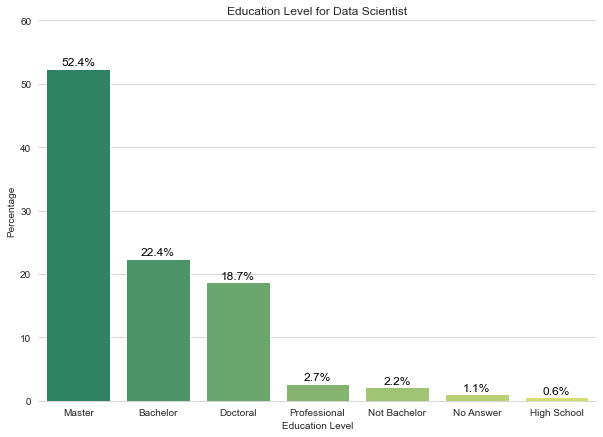

In [11]:
bar_plot_edu([roles_list[0]], palette = 'summer')

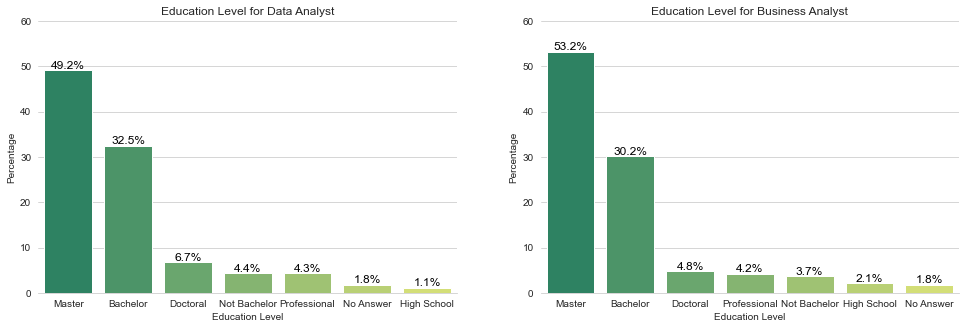

In [12]:
bar_plot_edu([roles_list[1], roles_list[2]], palette = 'summer')

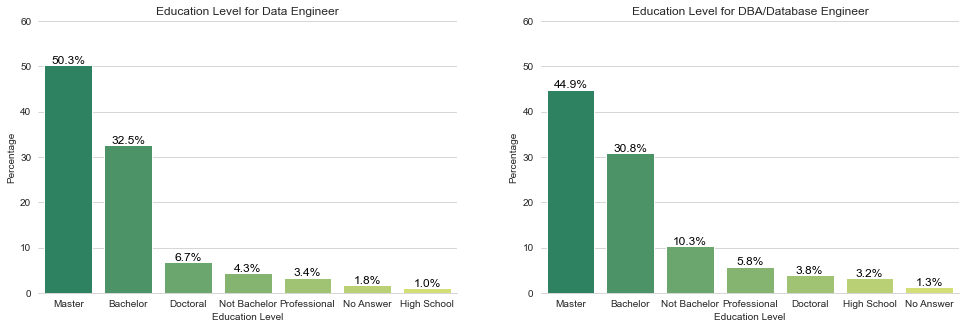

In [13]:
bar_plot_edu([roles_list[3], roles_list[4]], palette = 'summer')

<p>
    We can see that, independent of the role in the company, professionals with a <b>Master's degree</b> are always the majority among the ones who participated in the survey. The lowest proportion of Master's degrees is for DBA/Database Engineer and still it's a rate of approximately 45%.
</p>
<p>
    For all the occupations studied, the second most common education level is the <b>Bachelor's degree</b>. It's curious that, among data scientists, Bachelor's and Doctoral degrees percentages are pretty close to each other, especially in comparison with the other professions.
</p>
<p>
    When it comes to education, there is one more important aspect that we want to understand, and it's about the <b>courses</b> these professionals are more likely to attend. The relevance of the courses and platforms available online is unquestionable, as many offer a more practical approach and allow students to evolve in their own pace. Also, in the post-pandemic world, the adoption of online education should be even more relevant.
</p>

In [14]:
# Creating a list with the columns related to courses and platforms:
platforms_list = ['course_Udacity', 'course_Coursera', 'course_edX', 'course_DataCamp', 'course_DataQuest', 'course_Kaggle', 
                'course_Fast-ai', 'course_Udemy', 'course_LinkedIn', 'course_University-Degree', 'course_None', 'course_Other']

# Defining function to create a figure with the information needed:
def platform_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Platforms used by each profession
    '''
    # Creating objects:
    plat1 = []
    plat2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Percentage'
    y_label = 'Educational Platform'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for platform in platforms_list:
            plat1.append(platform.split('_')[1])
            perc1.append(round(df[platform].notnull().mean()*100, 2))
        
        df1['Platform'] = plat1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 7))
        
        # Annotating percentages1:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Platform', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Educational Platforms Used by ' + two_occupations[0] + 's',
        xlim = (0,70))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframes with the needed values:
        for platform in platforms_list:
            plat1.append(platform.split('_')[1])
            perc1.append(round(df[platform].notnull().mean()*100, 2))
        
        df1['Platform'] = plat1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        df = data[data['Current_Role'] == two_occupations[1]]
        for platform in platforms_list:
            plat2.append(platform.split('_')[1])
            perc2.append(round(df[platform].notnull().mean()*100, 2))
        
        df2['Platform'] = plat2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Platform', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Educational Platforms Used by ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,55)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Platform', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Educational Platforms Used by ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,55)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

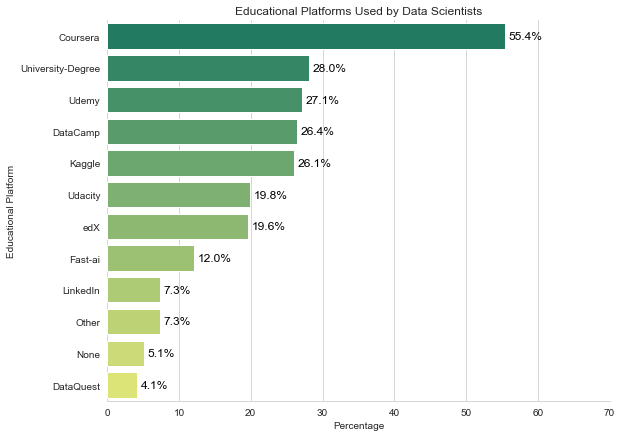

In [15]:
platform_rank([roles_list[0]], palette = 'summer')

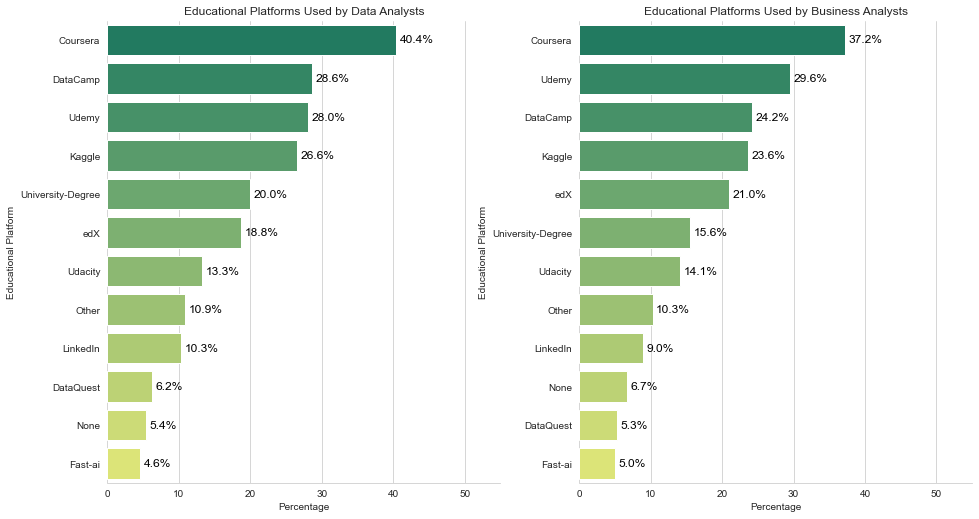

In [16]:
platform_rank([roles_list[1], roles_list[2]], palette = 'summer')

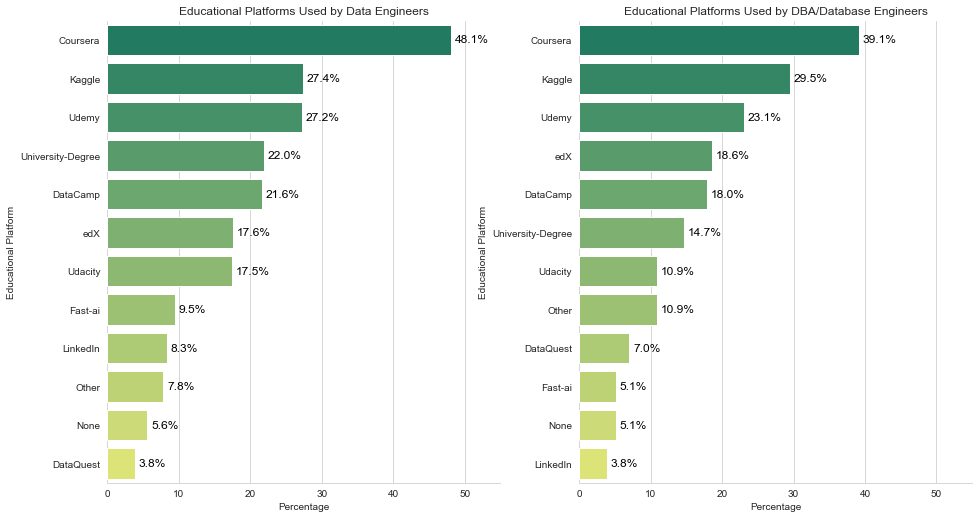

In [17]:
platform_rank([roles_list[3], roles_list[4]], palette = 'summer')

<p>
    According to the professionals that participated in the survey, <b>Coursera</b> seems to be the most used educational platform. It is important to say that the question presented specific options to be selected, and more than one could be chosen. With that being said, it looks like the majority of the professionals has already attended some course through Coursera's platform in comparison to the other platforms.
</p>
<p>
    It is interesting to see that for the roles of data engineers and DBA/database engineers, <b>Kaggle</b>'s platform outsands in second place, differing from the rank of other professionals.
</p>

<h3>Activities</h3>

<p>
    Let's check now the most common activities that these professionals perform in their daily work. When it comes to Data Science, it is usual for people to be more attracted to topics realted to machine learning algorithms. So it will be interesting to see if that is the activity that most of the professionals in the survey performs.
</p>

In [18]:
# Creating a list with the columns related to activities:
activities_list = ['actv_Data-Analysis', 'actv_Data-Infra', 'actv_ML-Prototypes', 
                   'actv_ML-Services', 'actv_ML-Improvement', 'actv_ML-Reserach', 'actv_None', 'actv_Other']

# Defining function to create a figure with the information needed:
def activites_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Activities performed by each profession
    '''
    # Creating objects:
    actv1 = []
    actv2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Percentage'
    y_label = 'Activities Performed'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for activity in activities_list:
            actv1.append(activity.split('_')[1])
            perc1.append(round(df[activity].notnull().mean()*100, 2))
        
        df1['Activity'] = actv1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
        
        # Annotating percentages:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Activity', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Activities Performed by ' + two_occupations[0] + 's',
        xlim = (0,80))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for activity in activities_list:
            actv1.append(activity.split('_')[1])
            perc1.append(round(df[activity].notnull().mean()*100, 2))
        
        df1['Activity'] = actv1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[1]]
        
        # Creating new dataframes with the needed values:
        for activity in activities_list:
            actv2.append(activity.split('_')[1])
            perc2.append(round(df[activity].notnull().mean()*100, 2))
        
        df2['Activity'] = actv2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Activity', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Activities Performed by ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,60)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Activity', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Activities Performed by ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,60)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

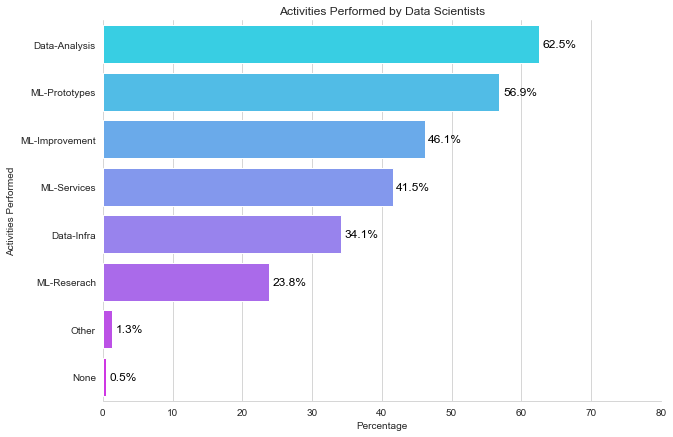

In [19]:
activites_rank([roles_list[0]], palette = 'cool')

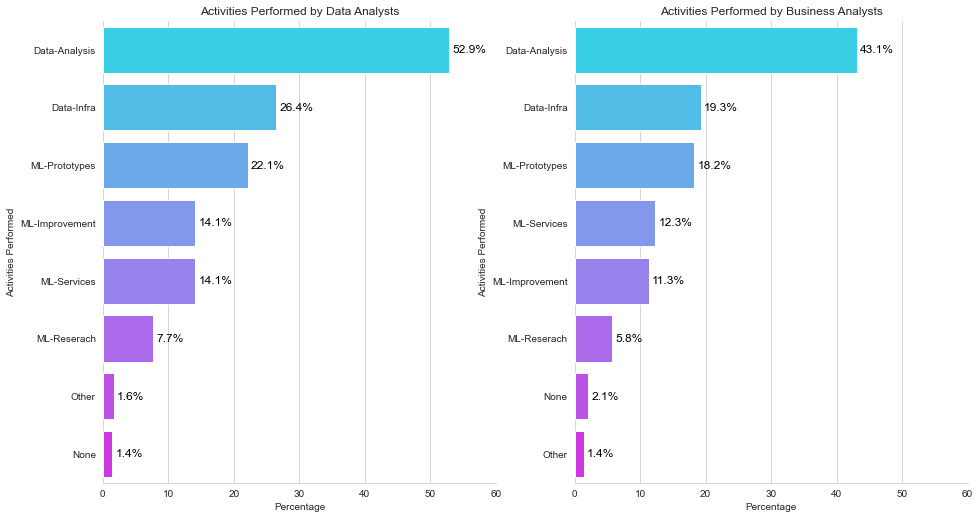

In [20]:
activites_rank([roles_list[1], roles_list[2]], palette = 'cool')

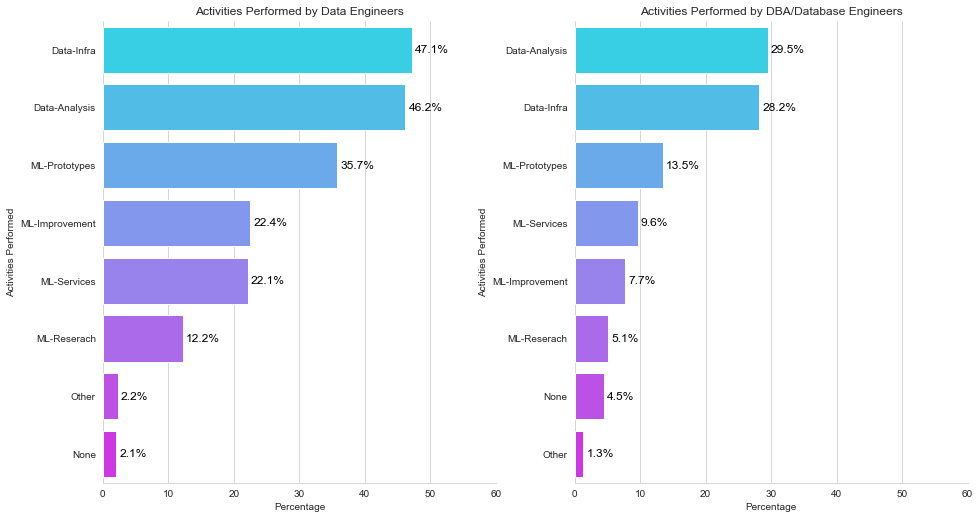

In [21]:
activites_rank([roles_list[3], roles_list[4]], palette = 'cool')

<p>
    We can see that <b>data analysis</b> is the most performed role, except when it comes to data engineers. In that case, as expected, working in tasks related to <b>data infrastructure</b> is the most common task. Even in that case, data analysis represents an important activity.
</p>
<p>
    According to the survey, dealing with data infrastructure is the second most common task for data and business analysts.
<p>
    Even though activities related to machine learning are pretty representative among data scientist's tasks, still data analysis plays a more relevant role in their daily work. It's interesting to note that, even though infrastructure is most commonly related to data engineer professionals, more than 30% of the data scientists perform activities related to data infrastructure.
</p>

<h3>Tools</h3>

<p>
    Our goal now is to identify which are the most common tools used in Data Science, would it be programming language, machine learning framework or relational database.
</p>

In [22]:
# Creating a list with the columns related to programming languages:
languages_list = ['prog_Python', 'prog_R', 'prog_SQL', 'prog_C', 'prog_C++', 'prog_Java', 'prog_Javascript', 
                  'prog_Typerscript', 'prog_Bash', 'prog_MATLAB', 'prog_None', 'prog_Other']

# Defining function to create a figure with the information needed:
def languages_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Languages used by each profession
    '''
    # Creating objects:
    lang1 = []
    lang2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Percentage'
    y_label = 'Programming Languages'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for language in languages_list:
            lang1.append(language.split('_')[1])
            perc1.append(round(df[language].notnull().mean()*100, 2))
        
        df1['Language'] = lang1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 7))
        
        # Annotating percentages:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Language', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Languages Used by ' + two_occupations[0] + 's',
        xlim = (0,90))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for language in languages_list:
            lang1.append(language.split('_')[1])
            perc1.append(round(df[language].notnull().mean()*100, 2))
        
        df1['Language'] = lang1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[1]]
        
        # Creating new dataframes with the needed values:
        for language in languages_list:
            lang2.append(language.split('_')[1])
            perc2.append(round(df[language].notnull().mean()*100, 2))
        
        df2['Language'] = lang2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Language', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Languages Used by ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,80)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Language', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Languages Used by ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,80)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

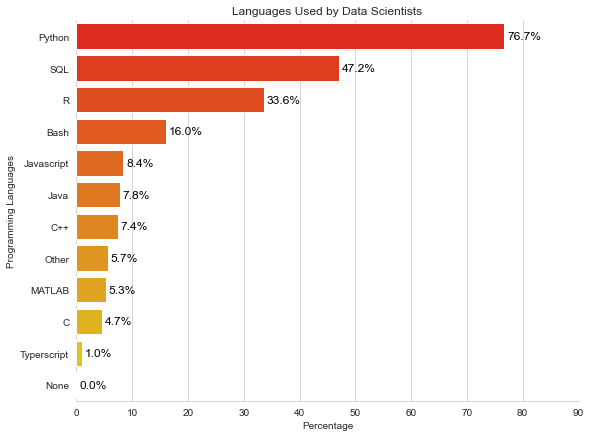

In [23]:
languages_rank([roles_list[0]], palette = 'autumn')

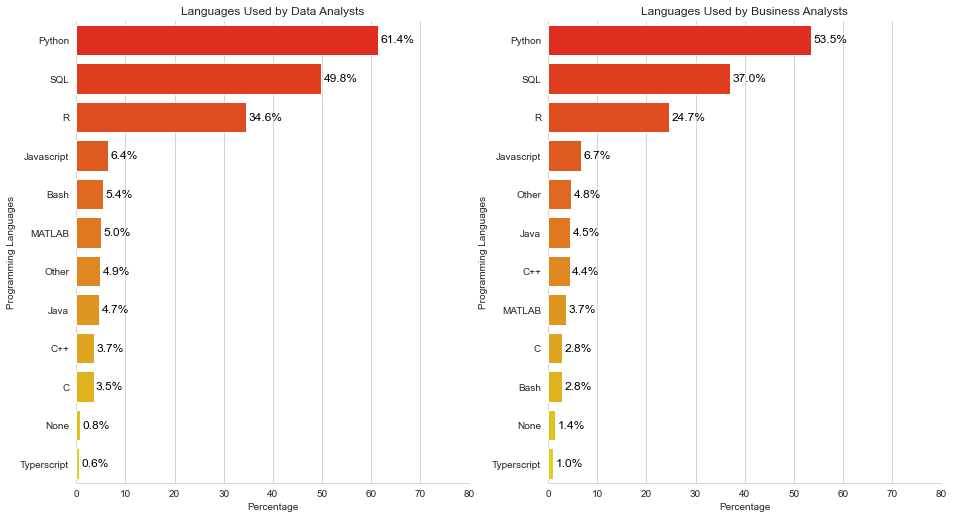

In [24]:
languages_rank([roles_list[1], roles_list[2]], palette = 'autumn')

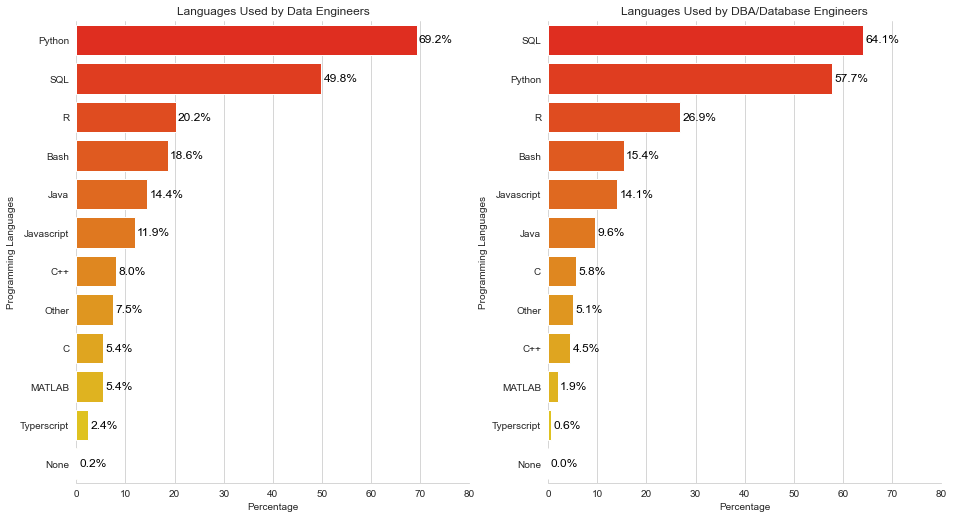

In [25]:
languages_rank([roles_list[3], roles_list[4]], palette = 'autumn')

<p>
    Undoubtedly, <b>Python</b> and <b>SQL</b> are the languages most used in the Data Science field. SQL only beats Python when it comes to DBA/database engineer, which would be expected.
</p>
<p>
    For data scientists, Python is used for almost 80% of the survey's participants, showing us how popular and powerful this language can be. In the other hand, the simplicity of the SQL language does not relate to its power: no matter what role in Data Science, according to the survey, SQL will be really important while performing the needed tasks.
</p>
<p>
    <b>R</b> is consolidated in the third position, representing an alternative to Python, although it doesn't stand out as the main language for any of the groups.
</p>

In [26]:
# Creating a list with the columns related to programming languages:
mlframew_list = ['ml_framew_Scikit', 'ml_framew_TensorFlow', 'ml_framew_Keras', 'ml_framew_RandomForest', 
                 'ml_framew_Xgboost', 'ml_framew_Pytorch', 'ml_framew_Caret', 'ml_framew_LightGBM', 
                 'ml_framew_SparkMLib', 'ml_framew_Fast-ai', 'ml_framew_None', 'ml_framew_Other']

# Defining function to create a figure with the information needed:
def mlframew_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Frameworks used by each profession
    '''
    # Creating objects:
    frame1 = []
    frame2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Percentage'
    y_label = 'Machine Learning Framework'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for framework in mlframew_list:
            frame1.append(framework.split('_')[2])
            perc1.append(round(df[framework].notnull().mean()*100, 2))
        
        df1['Framework'] = frame1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 7))
        
        # Annotating percentages1:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Framework', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Frameworks Used by ' + two_occupations[0] + 's',
        xlim = (0,80))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for framework in mlframew_list:
            frame1.append(framework.split('_')[2])
            perc1.append(round(df[framework].notnull().mean()*100, 2))
        
        df1['Framework'] = frame1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[1]]
        
        # Creating new dataframes with the needed values:
        for framework in mlframew_list:
            frame2.append(framework.split('_')[2])
            perc2.append(round(df[framework].notnull().mean()*100, 2))
        
        df2['Framework'] = frame2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Framework', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Frameworks Used by ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,60)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Framework', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Frameworks Used by ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,60)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

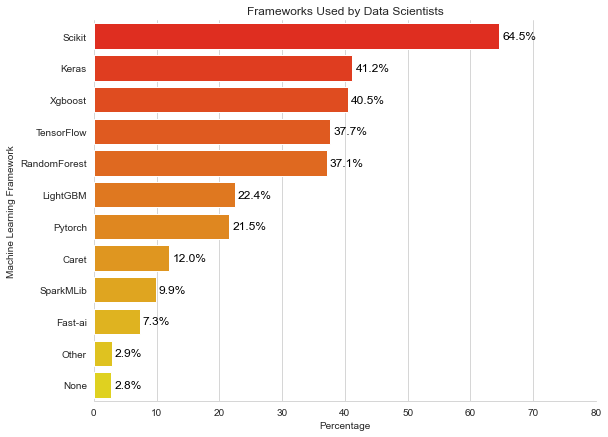

In [27]:
mlframew_rank([roles_list[0]], palette = 'autumn')

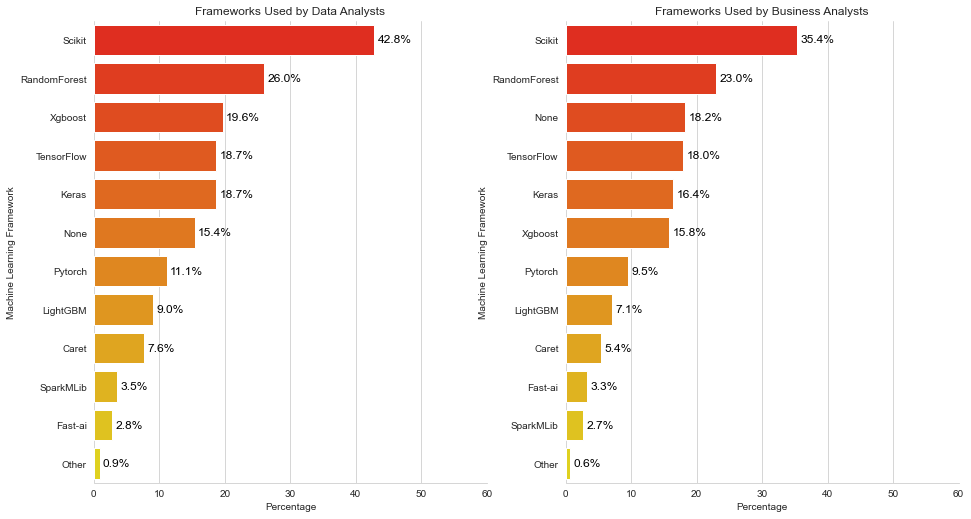

In [28]:
mlframew_rank([roles_list[1], roles_list[2]], palette = 'autumn')

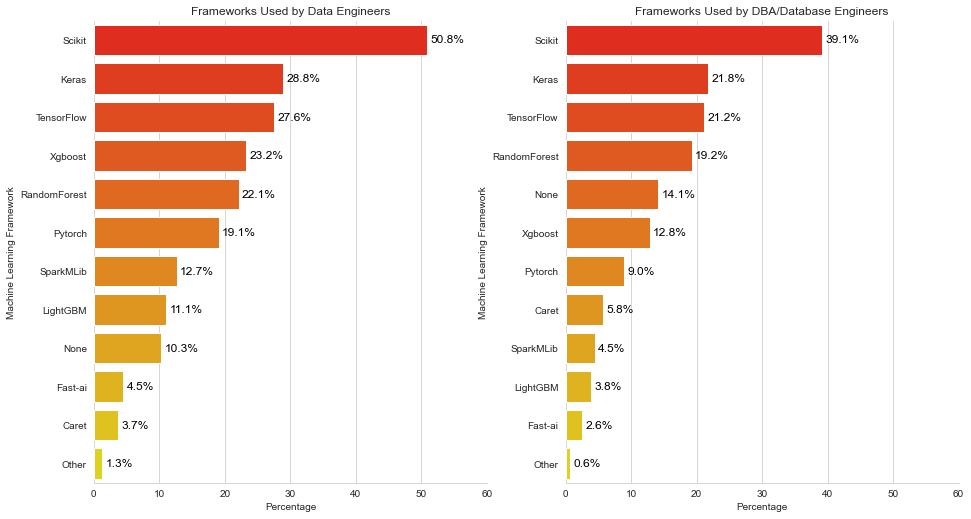

In [29]:
mlframew_rank([roles_list[3], roles_list[4]], palette = 'autumn')

<p>
    Once we found out that Python is the most used language among Kaggle survey's participants, it was expected that <b>Scikit-Learn</b> would be as well the most used machine learning framework, and we have just confirmed that.
</p>
<p>
    What stands out is the fact that among data and business analysts, <b>Random Forest</b> is the second most used machine learning framework, while for the other professionals this place belongs to <b>Keras</b> framework.
</p>

In [30]:
# Creating a list with the columns related to programming languages:
reldb_list = ['relDB_MySQL', 'relDB_PostgresSQL', 'relDB_SQLite', 'relDB_SQLServer', 'relDB_Oracle', 
              'relDB_Access', 'relDB_AWS-relDB-Server', 'relDB_AWS-DynamoDB', 'relDB_AzureSQL', 
              'relDB_GoogleCloudSQL', 'relDB_None', 'relDB_Other']

# Defining function to create a figure with the information needed:
def reldb_rank(two_occupations, data = ds_survey, palette = 'GnBu_r'):
    '''
    INPUT:
    two_occupations - list, 1 or 2 "Current_Role" (profession) values as string
    data - dataframe, default = ds_survey
    palette - string, matplotlib palette, default = "GnBu_r"
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Relational databases used by each profession
    '''
    # Creating objects:
    db1 = []
    db2 = []
    perc1 = []
    perc2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    # Defining the labels and style of the figure:
    x_label = 'Percentage'
    y_label = 'Relational Database'
    sns.set_style("whitegrid")
    
    # If a plot for a single profession is required:
    if len(two_occupations) == 1:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for db in reldb_list:
            db1.append(db.split('_')[1])
            perc1.append(round(df[db].notnull().mean()*100, 2))
        
        df1['Database'] = db1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 7))
        
        # Annotating percentages:
        for i in range(0, len(df1['Percentage'])):
            ax.text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting the plot:
        sns.barplot(x = 'Percentage', y = 'Database', data = df1, palette = palette).set(
        xlabel = x_label,
        ylabel = y_label,
        title = 'Relational Databases Used by ' + two_occupations[0] + 's',
        xlim = (0,50))
        
        sns.despine(left=True)
        fig.show()
    
    # If a plot for two professions is required:
    elif len(two_occupations) == 2:
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[0]]
        
        # Creating new dataframe with the needed values:
        for db in reldb_list:
            db1.append(db.split('_')[1])
            perc1.append(round(df[db].notnull().mean()*100, 2))
        
        df1['Database'] = db1
        df1['Percentage'] = perc1
        df1 = df1.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Filtering dataframe for the specific profession:
        df = data[data['Current_Role'] == two_occupations[1]]
        
        # Creating new dataframes with the needed values:
        for db in reldb_list:
            db2.append(db.split('_')[1])
            perc2.append(round(df[db].notnull().mean()*100, 2))
        
        df2['Database'] = db2
        df2['Percentage'] = perc2
        df2 = df2.sort_values('Percentage', ascending = False).reset_index(drop = True)
        
        # Creating the figure:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 8.5))
        
        # Annotating percentages 1:
        for i in range(0, len(df1['Percentage'])):
            ax[0].text((df1['Percentage'][i] + 0.5), i, str(round(df1['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 1:
        sns.barplot(x = 'Percentage', y = 'Database', data = df1, palette = palette, 
                    ax = ax[0]).set_title('Relational Databases Used by ' + two_occupations[0] + 's')
        ax[0].set_xlabel(x_label)
        ax[0].set_ylabel(y_label)
        ax[0].set_xlim(0,50)
        
        # Annotating percentages 2:
        for i in range(0, len(df2['Percentage'])):
            ax[1].text((df2['Percentage'][i] + 0.5), i, str(round(df2['Percentage'][i], 1))+'%', c = 'k', 
                    fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center')
        # Setting plot 2:
        sns.barplot(x = 'Percentage', y = 'Database', data = df2, palette = palette, 
                    ax = ax[1]).set_title('Relational Databases Used by ' + two_occupations[1] + 's')
        ax[1].set_xlabel(x_label)
        ax[1].set_ylabel(y_label)
        ax[1].set_xlim(0,50)
        
        sns.despine(left=True)
        fig.show()
    
    # If more than two professions are required:
    else:
        return print('two_occupations must be a list with 1 or 2 columns of interest')

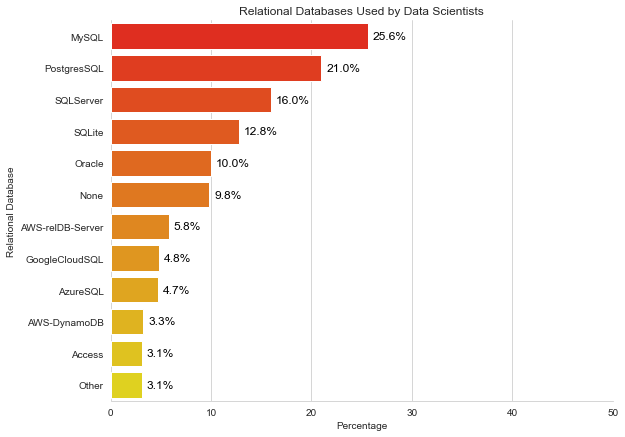

In [31]:
reldb_rank([roles_list[0]], palette = 'autumn')

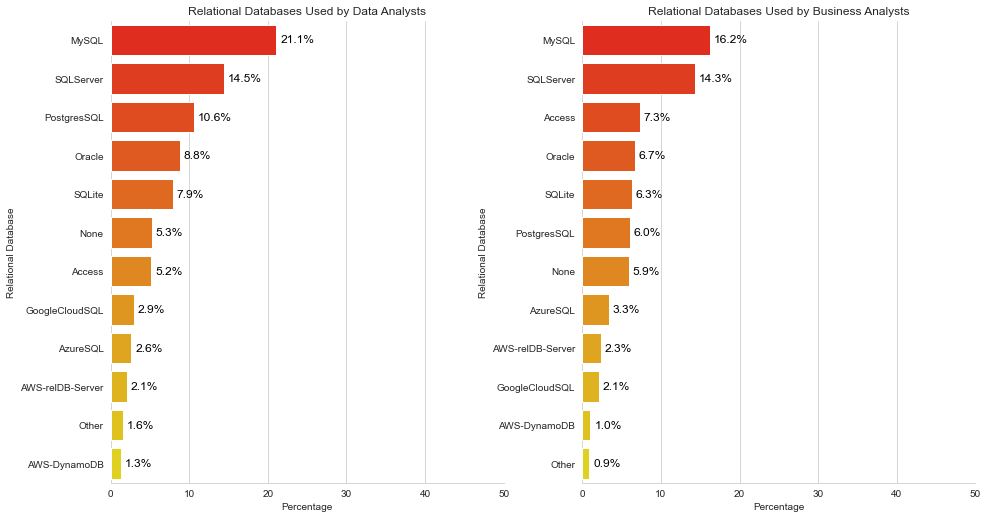

In [32]:
reldb_rank([roles_list[1], roles_list[2]], palette = 'autumn')

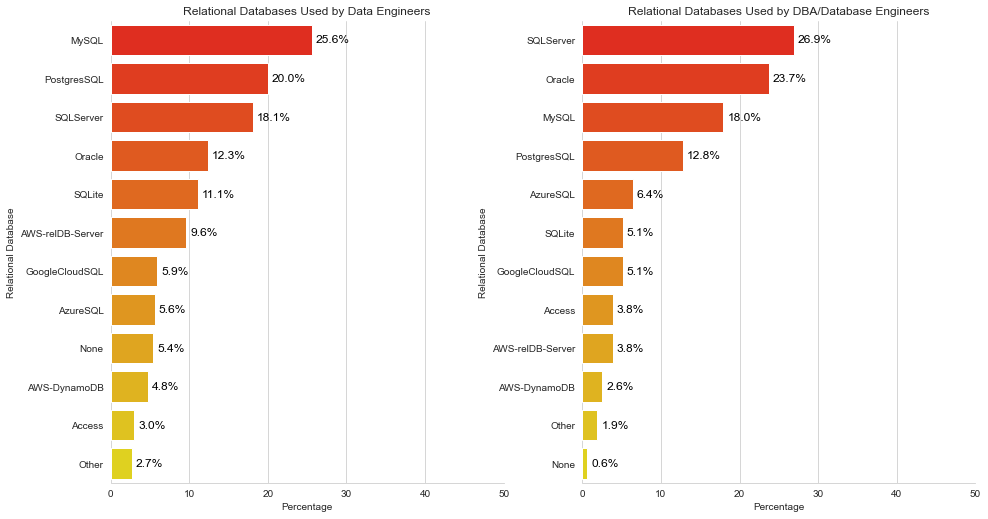

In [33]:
reldb_rank([roles_list[3], roles_list[4]], palette = 'autumn')

<p>
    When it comes to relational databases, <b>MySQL</b> outsantds in the majority of the professional groups. MySQL only gives place to <b>SQL Server</b> in the group of DBA/databases engineers.
</p>
<p>
    We can see that <b>cloud services</b> like Google Cloud SQL still haven't overcome traditional databases like MySQL, Postgrees and SQL Server, but many believe that it's just a matter of time, since cloud computing provides a lot of benefits in terms of physical structure, maintenance or costs (it is possible to pay according to the storage size or usage time).
</p>

<h3>Salary</h3>

<p>
    Let's talk about money?
</p>

In [34]:
# Checking how salary have been treated over the survey:
ds_survey['Annual_Income'].value_counts()

$0-999             762
10,000-14,999      408
100,000-124,999    406
40,000-49,999      392
30,000-39,999      389
50,000-59,999      378
1,000-1,999        326
60,000-69,999      312
70,000-79,999      286
125,000-149,999    275
20,000-24,999      260
5,000-7,499        253
15,000-19,999      248
150,000-199,999    244
25,000-29,999      242
7,500-9,999        215
80,000-89,999      203
90,000-99,999      202
2,000-2,999        185
3,000-3,999        139
4,000-4,999        126
200,000-249,999     74
> $500,000          42
250,000-299,999     34
300,000-500,000     28
Name: Annual_Income, dtype: int64

In [35]:
# Checking NaN values for salary:
null_perc = ds_survey['Annual_Income'].isnull().mean()
print('About ' + str(int((null_perc*100))) + '% of the participants did not declare their incomes.')

About 11% of the participants did not declare their incomes.


<p>
    Two things to be considered:
    <li> although we have filtered the dataframe in a way that students and not employed were excluded, 762 professionals have declared their incomes were in a range of 0 to 999. We are going to take this statement as true;</li>
    <li> about 11% haven't declared their incomes and we are going to ignore them while exploring salary's matter.</li>
</p>

In [36]:
# Creating function to transform income range into average salary:
def range_to_avg_salary(row):
    '''
    INPUT:
    row - range of salary values as string
    
    OUTPUT:
    avg_salary - average salary value as integer
    '''
    if type(row) == str:
        # Salary range 0 - 999:
        if row.startswith('$'):
            avg_salary = 500

        # Salary range > 500,000:
        elif row.startswith('>'):
            avg_salary = 500000

        # Salary range 1,000 to 500,000 or Nan:
        else:
            numbers = row.replace(',', '').split('-')
            num1 = int(numbers[0])
            num2 = int(numbers[1])
            avg_salary = (num1 + (num2 + 1))/2
    else:
        avg_salary = np.nan
            
    return avg_salary

# Applying function to the Annual_Income column:
ds_survey['Avg_Salary'] = ds_survey['Annual_Income'].apply(range_to_avg_salary)

# Deleting rows with NaN values for salary:
ds_survey_sal = ds_survey.dropna(subset = ['Avg_Salary'])

In [37]:
# Average salary by role (mean):
ds_survey_sal.groupby('Current_Role')['Avg_Salary'].mean().sort_values(ascending = False)

Current_Role
Data Scientist           61546.225275
Data Engineer            54965.519964
DBA/Database Engineer    48978.420863
Business Analyst         44159.825513
Data Analyst             36105.681722
Name: Avg_Salary, dtype: float64

In [38]:
# Average salary by role (median):
ds_survey_sal.groupby('Current_Role')['Avg_Salary'].median().sort_values(ascending = False)

Current_Role
Data Scientist           45000.0
Data Engineer            35000.0
DBA/Database Engineer    35000.0
Business Analyst         22500.0
Data Analyst             17500.0
Name: Avg_Salary, dtype: float64

In [39]:
# Average salary by gender (mean):
ds_survey_sal.groupby('Gender')['Avg_Salary'].mean().sort_values(ascending = False)

Gender
Prefer to self-describe    159625.000000
Prefer not to say           66725.701389
Male                        54714.825527
Female                      44003.631171
Name: Avg_Salary, dtype: float64

In [40]:
# Counting observations for 'Prefer to self_describe' value:
ds_survey_sal.Gender.value_counts()

Male                       5316
Female                     1033
Prefer not to say            72
Prefer to self-describe       8
Name: Gender, dtype: int64

In [41]:
# Since there's only 8 observations for 'Prefer to self_describe' gender value, we are not going to consider them:
ds_survey_gender = ds_survey_sal[ds_survey_sal['Gender'] != 'Prefer to self-describe']

In [42]:
# Average salary by gender (mean) - excluding 'Prefer to self_describe' gender value:
ds_survey_gender.groupby('Gender')['Avg_Salary'].mean().sort_values(ascending = False)

Gender
Prefer not to say    66725.701389
Male                 54714.825527
Female               44003.631171
Name: Avg_Salary, dtype: float64

In [43]:
# Average salary by gender (median) - excluding 'Prefer to self_describe' gender value:
ds_survey_gender.groupby('Gender')['Avg_Salary'].median().sort_values(ascending = False)

Gender
Prefer not to say    45000.0
Male                 35000.0
Female               22500.0
Name: Avg_Salary, dtype: float64

In [44]:
# Average salary by Education (mean):
ds_survey_sal.groupby('Education')['Avg_Salary'].mean().sort_values(ascending = False)

Education
Doctoral degree                                                      80326.816456
Master’s degree                                                      54417.020199
No formal education past high school                                 50907.903509
Some college/university study without earning a bachelor’s degree    44650.528796
I prefer not to answer                                               43188.356164
Professional degree                                                  40730.419355
Bachelor’s degree                                                    40278.300293
Name: Avg_Salary, dtype: float64

In [45]:
# Average salary by Education (median):
ds_survey_sal.groupby('Education')['Avg_Salary'].median().sort_values(ascending = False)

Education
Doctoral degree                                                      65000.0
Master’s degree                                                      35000.0
Professional degree                                                  17500.0
No formal education past high school                                 17500.0
I prefer not to answer                                               17500.0
Some college/university study without earning a bachelor’s degree    12500.0
Bachelor’s degree                                                    12500.0
Name: Avg_Salary, dtype: float64

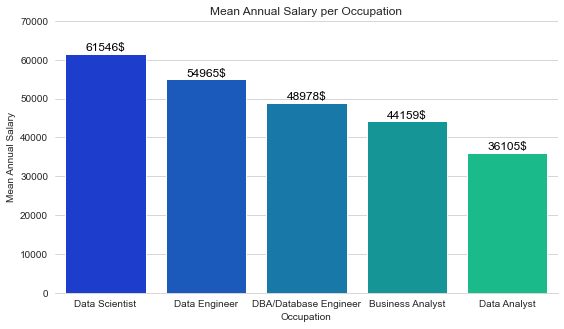

In [46]:
# Creating plot for average salary per occupation:
# Grouping by occupation and calculating the mean value:
occ_sal = ds_survey_sal.groupby('Current_Role')['Avg_Salary'].mean().sort_values(ascending = False)
        
# Creating the figure:
x_label = 'Occupation' 
y_label = 'Mean Annual Salary'
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 5))

# Annotating avg salary:
for occ in range(0, len(occ_sal.values)):
    ax.text(occ, (occ_sal.values[occ] + 1500), str(int(occ_sal.values[occ]))+'$', c = 'k', 
            fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')

# Setting the plot:
sns.barplot(x = occ_sal.index, y = occ_sal.values, palette = 'winter').set(
xlabel = x_label,
ylabel = y_label,
title = 'Mean Annual Salary per Occupation',
ylim = (0,70000))       
sns.despine(left=True)
fig.show()

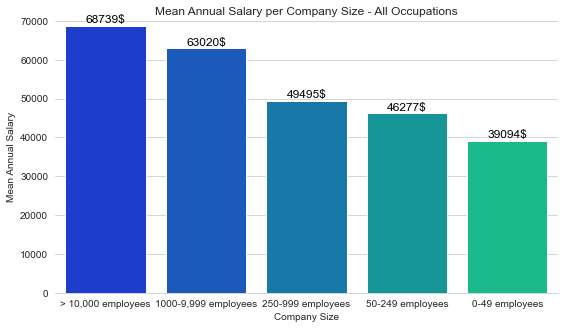

In [47]:
# Grouping by Company Size and calculating the mean value:
comp_sal = ds_survey_sal.groupby('Company_Size')['Avg_Salary'].mean().sort_values(ascending = False)
        
# Creating the figure:
x_label = 'Company Size' 
y_label = 'Mean Annual Salary'
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 5))

# Annotating avg salary:
for comp in range(0, len(comp_sal.values)):
    ax.text(comp, (comp_sal.values[comp] + 1500), str(int(comp_sal.values[comp]))+'$', c = 'k', 
            fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')

# Setting the plot:
sns.barplot(x = comp_sal.index, y = comp_sal.values, palette = 'winter').set(
xlabel = x_label,
ylabel = y_label,
title = 'Mean Annual Salary per Company Size - All Occupations',
ylim = (0,70000))       
sns.despine(left=True)
fig.show()

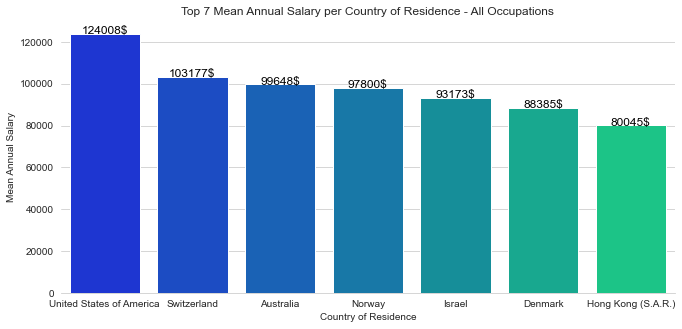

In [48]:
# Grouping by Country and calculating the mean value:
country_sal = ds_survey_sal.groupby('Res_Country')['Avg_Salary'].mean().sort_values(ascending = False)
        
# Creating the figure:
x_label = 'Country of Residence' 
y_label = 'Mean Annual Salary'
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (11, 5))

# Annotating avg salary:
for country in range(0, 7):
    ax.text(country, (country_sal.values[country] + 1500), str(int(country_sal.values[country]))+'$', c = 'k', 
            fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')

# Setting the plot:
sns.barplot(x = country_sal.index[0:7], y = country_sal.values[0:7], palette = 'winter').set(
xlabel = x_label,
ylabel = y_label,
title = 'Top 7 Mean Annual Salary per Country of Residence - All Occupations',
ylim = (0,130000))       
sns.despine(left=True)
fig.show()

<p>
    Calculating the mean annual income for the different occupations, it looks like <b>data scientists</b> are more likely to be better paid than the others, followed by <b>data engineers</b>.
</p>
<p>
    For the overall occupations in the Data Science field, <b>bigger companies</b> seem to pay best salaries, and the <b>United States</b> is the country with the highest average salary.
</p>

In [49]:
def plot_salary(occupation, ds_df = ds_survey_sal, ds_gen = ds_survey_gender, palette = 'GnBu_r', y_top = 90000):
    '''
    INPUT:
    occupation - string, 1 "Current_Role" (profession) value as string
    ds_df - dataframe with salaries converted to numeric, default = ds_survey_sal
    ds_gen - dataframe with filtered gender, default = ds_suhttps://medium.com/@evertonbin/5-stories-data-tell-us-about-data-scientists-7b970a90a8aarvey_gender
    palette - string, matplotlib palette, default = "GnBu_r"
    y_top = numeric, default = 90000 (limit for y axis)
    
    OUTPUT:
    figure plot - horizontal bar plot, x = Percentage, y = Relational databases used by each profession
    '''
    # Filtering dataframe for specific occupation:
    df1 = ds_df[ds_df['Current_Role'] == occupation]
    # Grouping by Education:
    ed_df = df1.groupby('Education')['Avg_Salary'].mean().sort_values(ascending = False)
    
    # Simplifying degree value:
    label_dict = {'Doctoral degree': 'Doctoral', 
                  'Master’s degree': 'Master', 
                  'Bachelor’s degree': 'Bachelor', 
                  'Professional degree': 'Professional', 
                  'Some college/university study without earning a bachelor’s degree': 'Not Bachelor', 
                  'No formal education past high school': 'High School', 
                  'I prefer not to answer': 'No Answer'}

    label = list(ed_df.index)
    for k, v in label_dict.items():
        for i in range(0, len(label)):
            if k == label[i]:
                label[i] = v
    
    # Filtering dataframe for specific occupation:
    df2 = ds_gen[ds_gen['Current_Role'] == occupation]
    # Grouping by Gender:
    gen_df = df2.groupby('Gender')['Avg_Salary'].mean().sort_values(ascending = False)

    sns.set_style("whitegrid")
            
    # Creating the figure:
    fig = plt.figure(figsize=(15.5,7))
    gs = gridspec.GridSpec(nrows=1, 
                           ncols=3, 
                           figure=fig, 
                           width_ratios= [1, 1, 1],
                           height_ratios=[1],
                           wspace=0.3,
                           hspace=1)
    ax0 = fig.add_subplot(gs[0:2])
    ax1 = fig.add_subplot(gs[2:3])
    
    # Annotating avg salary per Education:
    for ed in range(0, len(ed_df.values)):
        ax0.text(ed, (ed_df.values[ed] + 1500), str(int(ed_df.values[ed]))+'$', c = 'k',
                 fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
    # Annotating avg salary per Gender:
    for gn in range(0, len(gen_df.values)):
        ax1.text(gn, (gen_df.values[gn] + 1500), str(int(gen_df.values[gn]))+'$', c = 'k',
                 fontsize=12, fontstretch = 'normal', fontweight = 'light', va= 'center' , ha= 'center')
    
    # Setting plot 1:
    sns.barplot(x = label, y = ed_df.values, palette = palette, 
                ax = ax0).set_title('Mean Annual Salary by Occupation - ' + occupation)
    ax0.set_xlabel('Educational Level')
    ax0.set_ylabel('Mean Annual Salary')
    ax0.set_ylim(0, y_top)
    
    # Setting plot 2:
    sns.barplot(x = gen_df.index, y = gen_df.values, palette = palette, 
                ax = ax1).set_title('Mean Annual Salary by Gender - ' + occupation)
    ax1.set_xlabel('Gender')
    ax1.set_ylabel('Mean Annual Salary')
    ax1.set_ylim(0, y_top)
        
    sns.despine(left=True)
    fig.show()

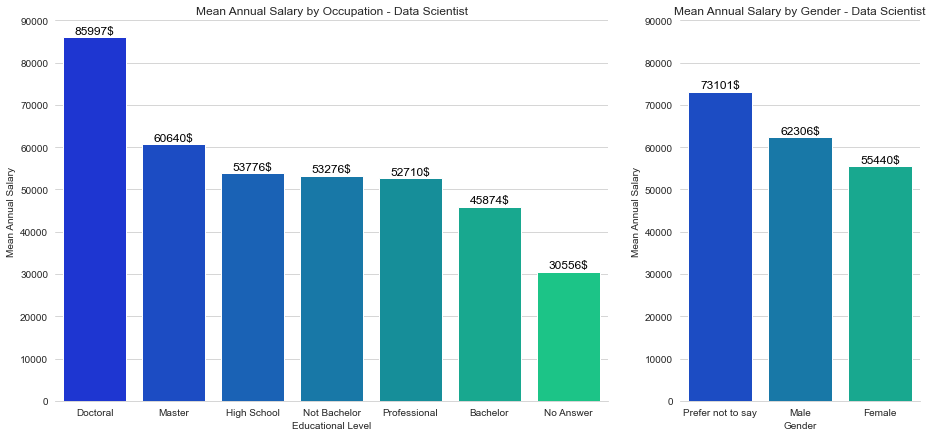

In [50]:
plot_salary(roles_list[0], palette = 'winter')

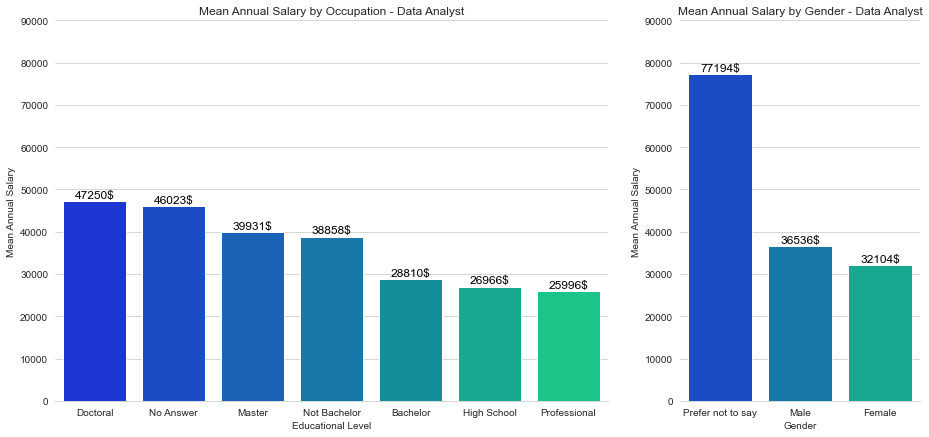

In [51]:
plot_salary(roles_list[1], palette = 'winter')

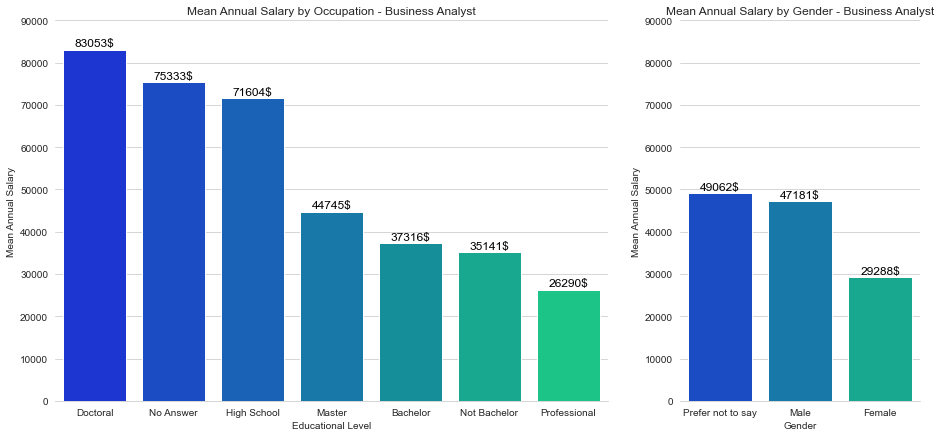

In [52]:
plot_salary(roles_list[2], palette = 'winter')

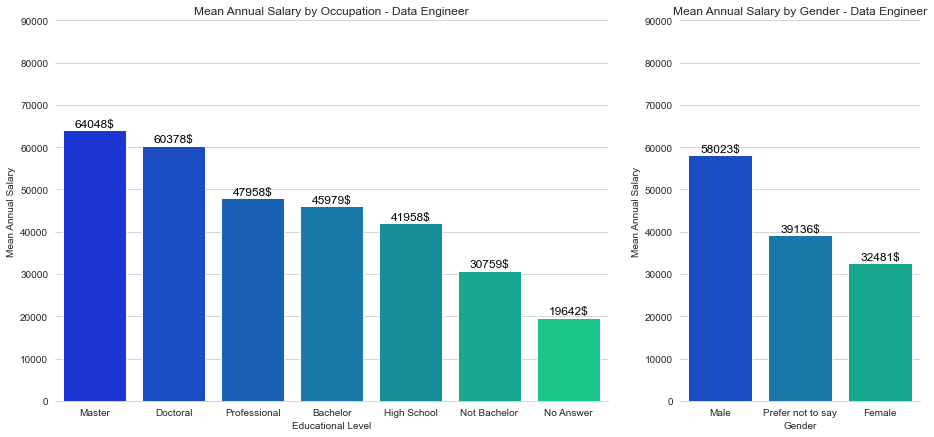

In [53]:
plot_salary(roles_list[3], palette = 'winter')

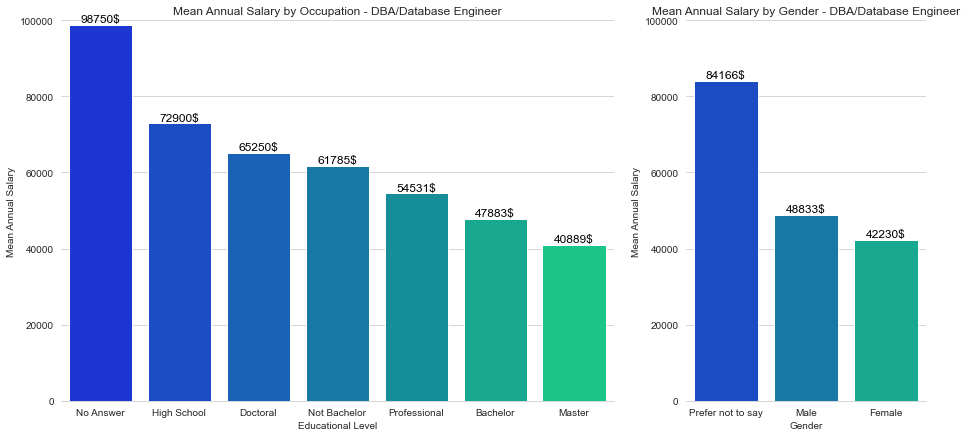

In [54]:
plot_salary(roles_list[4], palette = 'winter', y_top = 100000)

<p>
    In terms of salary, there's a lot to consider before jumping to conclusions, since people that have preferred not to declare their gender appear as the ones with the highest mean salary. Also, among data / business analysts and dba/database engineers, people who decided not to anwer about their educational level appear well ranked with better mean annual salaries.
</p>
<p>
    Given these limitations, <b>Doctoral degree</b> is usually related to highest payments. When it comes to data scientists, data engineers and data analysts, <b>Master's degree</b> also relates to better payment, although it doesn't seem to be true for the other occupations. In the other hand, <b>Bachelor's degree</b> cannot be related to higher incomes, what could indicate that, except for Doctoral and Master's degree, more important than the educational background is the knowledge in the field of interest.
</p>
<p>
    Sadly, but not surprisingly, women have lower average salary in comparison to men in all the Data Science fields treated here.
</p>

<h2>4- Predictive Model</h2>

<h3>Transformations</h3>

In [55]:
# Tranforming specific columns to dummy format:
full_list = platforms_list + activities_list + languages_list + mlframew_list + reldb_list

for col in full_list:
    bool_col = ds_survey[col].isnull()
    for i in range(0, len(bool_col)):
        if bool_col[i]:
            ds_survey[col].iloc[i] = int(0)
        else:
            ds_survey[col].iloc[i] = int(1)
    ds_survey[col] = pd.to_numeric(ds_survey[col])

In [56]:
#Tranforming Current Role into categorical type, since that's the column we want to predict:
ds_survey['Current_Role'] = ds_survey['Current_Role'].astype('category')

In [57]:
# Getting dummies from the other columns of interest:
cat_columns = ['Education', 'Years_Coding']
df_model = pd.get_dummies(ds_survey, columns = cat_columns, drop_first = True)
df_model.shape

(7241, 75)

In [58]:
# Since we want to see how well educational background, courses, skills and activities can distinguish different roles,
# we are going to drop the other columns that don't relate to that:
df_model = df_model.drop(columns = ['Age', 'Gender', 'Res_Country', 'Company_Size', 'Annual_Income', 'Avg_Salary'])

In [59]:
df_model.head()

,Current_Role,actv_Data-Analysis,actv_Data-Infra,actv_ML-Prototypes,actv_ML-Services,actv_ML-Improvement,actv_ML-Reserach,actv_None,actv_Other,course_Udacity,...,Education_Master’s degree,Education_No formal education past high school,Education_Professional degree,Education_Some college/university study without earning a bachelor’s degree,Years_Coding_10-20 years,Years_Coding_20+ years,Years_Coding_3-5 years,Years_Coding_5-10 years,Years_Coding_< 1 years,Years_Coding_I have never written code
0,Data Scientist,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,Data Scientist,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,Data Scientist,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Data Scientist,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Data Analyst,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [60]:
# Splitting dataframe into X and y:
X = df_model.loc[:, df_model.columns != 'Current_Role']
y = df_model['Current_Role']

<h3>Feature Selection</h3>

In [61]:
# Creating a Decision Tree model for the whole dataframe to check for main variables:
tree_model = DecisionTreeClassifier(random_state = 100)
tree_model.fit(X, y)

DecisionTreeClassifier(random_state=100)

In [62]:
# Checking feature importance:
feat_imp = pd.DataFrame()
feat_imp['Feature'] = X.columns
feat_imp['Importance'] = tree_model.feature_importances_
feat_imp = feat_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Checking 15 first most important features:
feat_imp.head(15)

,Feature,Importance
0,actv_ML-Prototypes,0.074791
1,course_Coursera,0.029422
2,course_Kaggle,0.027685
3,Education_Master’s degree,0.027355
4,actv_ML-Services,0.027031
5,Years_Coding_3-5 years,0.025205
6,actv_Data-Analysis,0.025051
7,course_DataCamp,0.024951
8,course_Udemy,0.023696
9,course_edX,0.022296


In [63]:
# Checking 15 last important features:
feat_imp.tail(15)

,Feature,Importance
53,prog_C,0.007957
54,ml_framew_Fast-ai,0.007919
55,Years_Coding_I have never written code,0.007326
56,relDB_AWS-relDB-Server,0.007222
57,Education_I prefer not to answer,0.006886
58,relDB_AzureSQL,0.006765
59,Education_No formal education past high school,0.006146
60,relDB_AWS-DynamoDB,0.005572
61,relDB_Other,0.004990
62,Years_Coding_20+ years,0.004944


<p>
    We can see that one machine learning activity appears as the most important feature to distinguish the different professions. We have seen before that those machine learning activities are most commonly performed by data scientists and that is probably why it was chosen as the most important feature.  
</p>
<p>
    The other main features have similar importance values, being the ones related to courses and activities the most common.
<p>
    We are going to select 50 of them to build our predictive model, according to the importance order, and see how well our model performs on predicting which profession relates to each profile.
</p>

In [64]:
# Selecting 50 first features:
features = []
for i in range(0, 50):
    feature = feat_imp.Feature.iloc[i]
    features.append(feature)

<h3>Model Training</h3>

In [65]:
# Checking class balance:
df_model.Current_Role.value_counts()

Data Scientist           4085
Data Analyst             1598
Business Analyst          778
Data Engineer             624
DBA/Database Engineer     156
Name: Current_Role, dtype: int64

<p>
    We have five different classes and some of them with only few observations. We are not going to balance the dataframe, since we just want to have an overall view on how well our model can perform when distinguishing the different classes/professions.
</p>

In [66]:
# Splitting data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)

In [67]:
# Using GridSearchCV to find the best parameters:
grid_values = {'n_estimators': [25, 50, 75, 100, 150], 'max_features': [3, 5, 7, 10, 13], 'max_depth': [None, 5, 15, 30]}
rf_model = RandomForestClassifier()

grid_rf_f1 = GridSearchCV(rf_model, param_grid = grid_values, scoring = 'f1_micro')
grid_rf_f1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 15, 30],
                         'max_features': [3, 5, 7, 10, 13],
                         'n_estimators': [25, 50, 75, 100, 150]},
             scoring='f1_micro')

In [68]:
# Best parameters:
grid_rf_f1.best_params_

{'max_depth': 15, 'max_features': 7, 'n_estimators': 150}

In [69]:
# Best score:
grid_rf_f1.best_score_

0.614837682124492

In [70]:
# Training model for best parameters:
rf_final_model = RandomForestClassifier(max_depth = 15, max_features = 10, n_estimators = 75)
rf_final_model.fit(X_train, y_train)

# Predicting for test values:
y_pred = rf_final_model.predict(X_test)

<h3>Model Evaluation</h3>

In [71]:
f1 = f1_score(y_test, y_pred, average = 'micro')
f1

0.5922687528762081

<p>
    We can see that our model has not performed well when it comes to well understand profile differences that would lead to different professions and roles in the Data Science field.
</p>
<p>
    But it makes sense. <b>Data Science</b> is a relatively new field and it is characterized by the intersection of different areas of knowledge, such as statistics, computer science and business. With that being said, even though one data scientist may not be responsible for data infrastructure, he will still have to know some programming language, while one data engineer may not perform with machine learning algorithms, but still will have to deal with data transformation when creating data pipelines.
</p>
<p>
    It's still common to see companies announcing job opportunities, let's say, for a data analyst, while the job description refers to a data engineer. We couldn't call it a big mistake, once these different 'specializations' have so much in common, and in some companies they are responsible for the whole process, from data structure to model deployment.
</p>

<h2>5- Conclusion</h2>

<li><b>Education</b>: a significant portion of the participants in the Kaggle Survey has a Master's degree, still attending online courses in platforms like Coursera, Udemy, DataCamp, Udacity and many others is very common.</li>
<li><b>Activities</b>: it's not all about machine learning algorithms. No matter what is your specialization in the Data Science field, it is likely that you will have to deal with data analysis procedures.</li>
<li><b>Tools</b>: the most used programming languages are Python and SQL and the most popular machine learning frameworks are the whole Scikit-Learn package along with Keras and Random Forest itself. When it comes to relational databases, MySQL is the one that stands out.</li>
<li><b>Salary</b>: data scientists tend to present some advantages when it comes to money incomes, especially if they live in the USA, and big companies tend to offer better salaries than the smaller ones. Although, we still have bad news: even in this field, women have lower payments in comparison to men.</li>
<li><b>Education x Salary</b>: Doctoral and Master's degrees seem to turbine money incomes, but there are a lot of professionals with different educational backgrounds from Bachelor's degree to only High School and there is no significant difference in their salaries, which may indicate that the Data Science field is open to those who are dedicated to developing the necessary skills.</li>